# importing 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn import tree
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler, StandardScaler,OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SequentialFeatureSelector, chi2, f_classif,SelectPercentile
from sklearn.feature_selection import SelectKBest


# read data

In [2]:
df_train=pd.read_csv(r"C:\Users\lenovo\Downloads\intrution data\intrution data\train_COMPETITION.csv")

In [3]:
df_test=pd.read_csv(r"C:\Users\lenovo\Downloads\intrution data\intrution data\test_COMPETITION.csv")

In [4]:
df_train.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
0,7060,0,tcp,smtp,SF,1129,327,0,0,0,...,1.00,0.00,0.14,0.02,0.0,0.04,0.0,0.01,21,0
1,22036,0,tcp,http,SF,242,2147,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
2,19555,0,tcp,http,SF,299,3991,0,0,0,...,1.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,21,0
3,11393,0,udp,domain_u,SF,43,133,0,0,0,...,1.00,0.01,0.00,0.00,0.0,0.00,0.0,0.00,21,0
4,22783,0,tcp,telnet,S0,0,0,0,0,0,...,0.14,0.19,0.05,0.00,0.1,0.67,0.0,0.00,4,0


In [5]:
df_test.head()

,ID,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
0,15831,0,tcp,http,REJ,0,0,0,0,0,...,236,1.00,0.00,0.09,0.01,0.0,0.0,1.0,0.07,21
1,12617,0,tcp,ftp_data,SF,151,0,0,0,0,...,37,0.33,0.07,0.33,0.05,0.0,0.0,0.0,0.00,20
2,16328,0,udp,domain_u,SF,44,139,0,0,0,...,255,1.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,21
3,11403,0,tcp,http,SF,251,4014,0,0,0,...,255,1.00,0.00,0.00,0.01,0.0,0.0,0.0,0.00,21
4,11891,0,tcp,smtp,SF,1317,367,0,0,0,...,166,0.80,0.40,0.20,0.02,0.0,0.0,0.0,0.00,21


In [6]:
df_train.shape

(17251, 44)

In [7]:
df_test.shape

(5751, 43)

# data cleaning

In [8]:
df_train.isna().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [9]:
df_test.isna().sum()

ID                             0
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_r

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           17251 non-null  int64  
 1   duration                     17251 non-null  int64  
 2   protocol_type                17251 non-null  object 
 3   service                      17251 non-null  object 
 4   flag                         17251 non-null  object 
 5   src_bytes                    17251 non-null  int64  
 6   dst_bytes                    17251 non-null  int64  
 7   land                         17251 non-null  int64  
 8   wrong_fragment               17251 non-null  int64  
 9   urgent                       17251 non-null  int64  
 10  hot                          17251 non-null  int64  
 11  num_failed_logins            17251 non-null  int64  
 12  logged_in                    17251 non-null  int64  
 13  num_compromised 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5751 entries, 0 to 5750
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5751 non-null   int64  
 1   duration                     5751 non-null   int64  
 2   protocol_type                5751 non-null   object 
 3   service                      5751 non-null   object 
 4   flag                         5751 non-null   object 
 5   src_bytes                    5751 non-null   int64  
 6   dst_bytes                    5751 non-null   int64  
 7   land                         5751 non-null   int64  
 8   wrong_fragment               5751 non-null   int64  
 9   urgent                       5751 non-null   int64  
 10  hot                          5751 non-null   int64  
 11  num_failed_logins            5751 non-null   int64  
 12  logged_in                    5751 non-null   int64  
 13  num_compromised   

In [12]:
df_train.describe()

,ID,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
count,17251.000000,17251.000000,1.725100e+04,1.725100e+04,17251.000000,17251.000000,17251.0,17251.000000,17251.000000,17251.000000,...,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000,17251.000000
mean,11453.391977,300.978958,3.107782e+04,3.531403e+03,0.000116,0.025274,0.0,0.184627,0.001101,0.388151,...,0.513184,0.083868,0.147851,0.031412,0.294951,0.289118,0.116886,0.118235,19.474291,0.478291
std,6632.391641,2646.007952,2.910731e+06,9.012346e+04,0.010767,0.268866,0.0,2.081791,0.043724,0.487343,...,0.449423,0.189233,0.309810,0.109439,0.449514,0.450570,0.304704,0.316774,2.327471,0.499543
min,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5720.500000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
50%,11409.000000,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.470000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
75%,17197.500000,0.000000,2.770000e+02,4.920000e+02,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,...,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000,1.000000
max,23001.000000,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,0.0,77.000000,4.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,1.000000


In [13]:
df_test.describe()

,ID,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,5751.000000,5751.000000,5.751000e+03,5.751000e+03,5751.0,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,...,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000,5751.000000
mean,11641.807686,325.848548,1.032655e+04,3.758329e+03,0.0,0.021214,0.000174,0.242567,0.001391,0.381673,...,111.997392,0.507872,0.086406,0.148341,0.032723,0.288206,0.281617,0.126794,0.125582,19.446009
std,6662.345769,2845.948746,1.919800e+05,9.859115e+04,0.0,0.243672,0.013186,2.404511,0.052732,0.485839,...,110.170809,0.447719,0.191955,0.308310,0.116913,0.446535,0.446816,0.316052,0.325594,2.345207
min,1.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5862.000000,0.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,11778.000000,0.000000,4.300000e+01,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.430000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,17438.500000,0.000000,2.640000e+02,4.735000e+02,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,...,255.000000,1.000000,0.070000,0.060000,0.010000,1.000000,1.000000,0.000000,0.000000,21.000000
max,22998.000000,41802.000000,7.248552e+06,5.131424e+06,0.0,3.000000,1.000000,30.000000,3.000000,1.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [14]:
df_train.nunique()

ID                             17251
duration                         539
protocol_type                      3
service                           66
flag                              11
src_bytes                       1338
dst_bytes                       3051
land                               2
wrong_fragment                     3
urgent                             1
hot                               18
num_failed_logins                  4
logged_in                          2
num_compromised                   22
root_shell                         2
su_attempted                       3
num_root                          22
num_file_creations                16
num_shells                         2
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            442
srv_count                        382
serror_rate                       67
srv_serror_rate                   49
r

# Data Cleaning

In [15]:
df_train.drop(['urgent','is_host_login','num_outbound_cmds'],axis=1,inplace=True)

In [16]:
df_test.drop(['urgent','is_host_login','num_outbound_cmds'],axis=1,inplace=True)

In [17]:
df_train.drop('ID',axis=1,inplace=True)

In [18]:
df_test.drop('ID',axis=1,inplace=True)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17251 entries, 0 to 17250
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     17251 non-null  int64  
 1   protocol_type                17251 non-null  object 
 2   service                      17251 non-null  object 
 3   flag                         17251 non-null  object 
 4   src_bytes                    17251 non-null  int64  
 5   dst_bytes                    17251 non-null  int64  
 6   land                         17251 non-null  int64  
 7   wrong_fragment               17251 non-null  int64  
 8   hot                          17251 non-null  int64  
 9   num_failed_logins            17251 non-null  int64  
 10  logged_in                    17251 non-null  int64  
 11  num_compromised              17251 non-null  int64  
 12  root_shell                   17251 non-null  int64  
 13  su_attempted    

In [26]:
df_train['Class'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:ylabel='Class'>

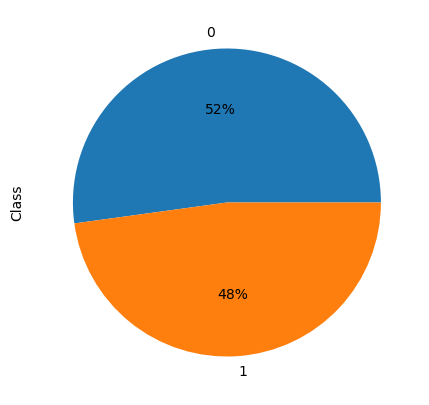

In [27]:
df_train['Class'].value_counts().plot( kind='pie', figsize=(5, 5), fontsize=10, autopct='%1.0f%%')

In [28]:
Results = set(df_train['Class'].values)
print(Results,end=" ")

{0, 1} 

In [29]:
df_train['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)

In [30]:
df_train['flag'].unique()

array(['SF', 'S0', 'REJ', 'RSTR', 'RSTO', 'S2', 'S1', 'RSTOS0', 'SH',
       'OTH', 'S3'], dtype=object)

In [31]:
df_train.duplicated().sum()

0

In [32]:
df_test.duplicated().sum()


0

In [33]:
df_train.drop('service',axis=1,inplace=True)

In [34]:
df_test.drop('service',axis=1,inplace=True)

In [35]:
df_train.shape

(17251, 39)

In [92]:
df_test.shape

(5751, 50)

In [36]:
df_train = pd.get_dummies(df_train,columns=['protocol_type','flag'],prefix="",prefix_sep="")

In [37]:
df_test = pd.get_dummies(df_test,columns=['protocol_type','flag'],prefix="",prefix_sep="")

# Train_Test_Split

In [ ]:
ytrain=df_train['Class']
xtrain=df_train.drop('Class',axis=1)

In [41]:
xtrain_train,xtest_train ,ytrain_train,ytest_train = train_test_split(xtrain,ytrain, test_size= 0.25 , random_state=42)

In [42]:
xtrain_train.shape,xtest_train.shape ,ytrain_train.shape,ytest_train.shape

((12938, 50), (4313, 50), (12938,), (4313,))

# DATA SCALING

In [43]:
def scaled_train(scaled_model):
    xtrain_scaled=scaled_model.fit_transform(xtrain_train)
    return xtrain_scaled 
    

In [44]:
scaled_train=scaled_train(StandardScaler())

In [45]:
scaled_train

array([[-0.11070652, -0.0114712 , -0.03806439, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.11070652, -0.01141137, -0.03969857, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.11070652, -0.00839198, -0.03969857, ..., -0.01758586,
         0.83660506, -0.04573008],
       ...,
       [-0.11070652, -0.0114843 , -0.03969857, ..., -0.01758586,
        -1.19530714, -0.04573008],
       [-0.11070652, -0.01139173, -0.02599853, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.11070652, -0.01140185,  0.65883132, ..., -0.01758586,
         0.83660506, -0.04573008]])

In [46]:
def scaled_test(scaled_model):
    xtrain_scaled=scaled_model.fit_transform(xtrain_train)
    xtest_scaled=scaled_model.transform(xtest_train)
    return xtest_scaled 

In [47]:
scaled_test=scaled_test(StandardScaler())

In [48]:
scaled_test

array([[-0.11070652, -0.0113825 , -0.00466825, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.10992298, -0.01111223, -0.00958306, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.11070652, -0.0114843 , -0.03969857, ..., -0.01758586,
        -1.19530714, -0.04573008],
       ...,
       [-0.11070652, -0.01141941, -0.03130653, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.10287104, -0.01141494, -0.03023756, ..., -0.01758586,
         0.83660506, -0.04573008],
       [-0.11070652, -0.01140185, -0.02757127, ..., -0.01758586,
         0.83660506, -0.04573008]])

# PCA

In [76]:
pca = PCA(n_components=20)
pca_features = pca.fit_transform(scaled_train) 
print('Shape before PCA: ', scaled_train.shape)

Shape before PCA:  (12938, 50)


In [77]:
print('Shape after PCA: ', pca_features.shape)

Shape after PCA:  (12938, 20)


In [78]:
pca_features

array([[-2.13375076, -0.69058977, -0.40801459, ..., -0.11768526,
        -0.0714911 , -0.15278607],
       [-1.5255166 , -0.30932106,  0.10227748, ...,  0.08171795,
         0.12435486,  0.05155741],
       [-1.45950973, -0.4667075 ,  0.03925342, ...,  0.09544266,
         0.09681646,  0.09707179],
       ...,
       [ 1.86727666,  6.29373674, -0.23465467, ..., -0.47227059,
         0.01492777,  0.21109343],
       [-2.29547631, -0.89318699, -0.0494548 , ...,  0.08240351,
        -0.01978225, -0.04943688],
       [-2.67631338, -0.78647829,  0.01828744, ..., -0.0210922 ,
         0.55908453,  0.16771967]])

In [79]:
pca.explained_variance_

array([8.81175068, 6.0079748 , 4.10974471, 3.24493147, 2.25455227,
       1.99554963, 1.76953314, 1.39004035, 1.27207526, 1.2011776 ,
       1.09560434, 1.05939402, 1.03945263, 1.00986216, 1.00403149,
       1.0026251 , 1.00092594, 0.9960482 , 0.99304971, 0.95114672])

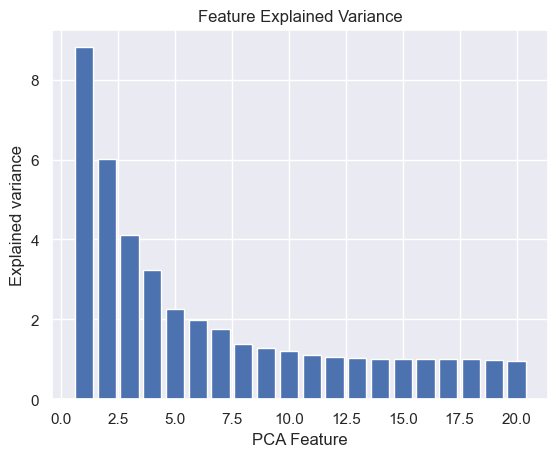

In [80]:
sns.set()
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
 
 
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

 # Logistic Regression with grid search

In [51]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(scaled_train,ytrain_train)
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'penalty': 'l2'}
accuracy : 0.9817591692755308


# SVM with grid search

In [52]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc =SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(scaled_train,ytrain_train)
predict_SVM=clf.predict(scaled_test)
accuracy_score(predict_SVM,ytest_train)

0.9939717134245305

In [53]:
comparison_df=pd.DataFrame({'predict':predict_SVM,'ytest':ytest_train})
comparison_df

,predict,ytest
10866,0,0
8776,1,1
3975,1,1
5871,0,0
7974,1,1
...,...,...
14965,1,1
11290,1,1
5441,0,0
3492,0,0


In [54]:
accuracy_score(predict_SVM,ytest_train)

0.9939717134245305

# Tree

In [72]:
dt = tree.DecisionTreeClassifier(random_state=5)
dt.fit(xtrain_train,ytrain_train)
predict_TREE=dt.predict(xtest_train)
accuracy_score(predict_TREE,ytest_train)

0.9958265708323673

# XGBOOST

In [82]:
xgb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
xgb.fit(scaled_train,ytrain_train)
predict_xgb=xgb.predict(scaled_test)
accuracy_score(predict_xgb,ytest_train)

0.9937398562485509

# Naive bays

In [57]:
gnb = GaussianNB()
gnb.fit(scaled_train,ytrain_train)
predict_nb=gnb.predict(scaled_test)
accuracy_score(predict_nb,ytest_train)

0.914908416415488

In [58]:
print("Number of mislabeled points out of a total %d points : %d" % (scaled_test.shape[0], (ytest_train != predict_nb).sum()))

Number of mislabeled points out of a total 4313 points : 367


# KNN

In [59]:
knn=KNeighborsClassifier(n_neighbors=100)
knn.fit(scaled_train,ytrain_train)
predict_knn=knn.predict(scaled_test)
accuracy_score(predict_knn,ytest_train)

0.9789009969858568

# Random Forest

In [69]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=0)
rfc.fit(xtrain_train,ytrain_train)
predict_rf=rfc.predict(xtest_train)
accuracy_score(predict_rf,ytest_train)

0.9967539995362856

In [70]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(xtrain_train,ytrain_train)

predict_grid_rg=grid_results.predict(xtest_train)
accuracy_score(predict_grid_rg,ytest_train)



0.9979132854161836

In [ ]:
# Summarize the results in a readable format
print("Best: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))


# SVM

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc =SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(scaled_train,ytrain_train)
predict_svm=clf.predict(scaled_test)
accuracy_score(predict_svm,ytest_train)

# The 4 best classification model are Random Forest & Decision Tree&  SVM  & XGBoost 

In [87]:
max_depth=[2, 8, 16]
n_estimators = [64, 128, 256]
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
# Build the grid search
dfrst = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
grid = GridSearchCV(estimator=dfrst, param_grid=param_grid, cv = 5)
grid_results = grid.fit(xtrain,ytrain)

final_result=grid_results.predict(df_test)


In [88]:
final_result

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

In [93]:
final_result.tofile('data.csv', sep = ',')
